In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
df = pd.read_csv(path)

X_train = np.array([df['x'], df['y']]).T
y_train_o = np.array(df['z'])

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train_o, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2

X_train_x = np.array(df['x'])
X_train_y = np.array(df['y'])

X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_train_x,y_train_o, test_size=0.2, random_state=0)

X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X_train_y,y_train_o, test_size=0.2, random_state=0)


<Axes: xlabel='y', ylabel='z'>

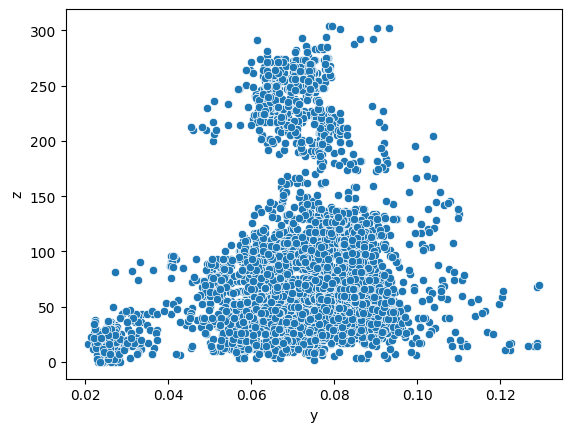

In [103]:
import seaborn as sns
# display the connection between x and z, y and z
sns.scatterplot(x=df['y'], y=df['z'])




In [104]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
rfr_mse, rfr_rmse, rfr_mae, rfr_r2 = evaluate_regression(y_test, y_pred)
print('[RFR]')
print('mse: ', rfr_mse)
print('rmse: ', rfr_rmse)
print('mae: ', rfr_mae)
print('r2: ', rfr_r2)

RFR_poly = RandomForestRegressor()
RFR_poly.fit(X_train_poly,y_train)
y_pred_poly = RFR_poly.predict(X_test_poly)
rfr_poly_mse, rfr_poly_rmse, rfr_poly_mae, rfr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[RFR_poly]')
print('mse: ', rfr_poly_mse)
print('rmse: ', rfr_poly_rmse)
print('mae: ', rfr_poly_mae)
print('r2: ', rfr_poly_r2)

[RFR]
mse:  2451.194584513692
rmse:  49.50954033833976
mae:  31.258394711992445
r2:  0.5005927061612854
[RFR_poly]
mse:  2375.1550300283284
rmse:  48.73556227261904
mae:  30.706553352219075
r2:  0.5160850331965017


In [105]:
from sklearn.svm import SVR

Svr = SVR()
Svr.fit(X_train,y_train)
y_pred = Svr.predict(X_test)
svr_mse, svr_rmse, svr_mae, svr_r2 = evaluate_regression(y_test, y_pred)
print('[SVR]')
print('mse: ', svr_mse)
print('rmse: ', svr_rmse)
print('mae: ', svr_mae)
print('r2: ', svr_r2)

Svr_poly = SVR()
Svr_poly.fit(X_train_poly,y_train)
y_pred_poly = Svr_poly.predict(X_test_poly)
svr_poly_mse, svr_poly_rmse, svr_poly_mae, svr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[SVR_poly]')
print('mse: ', svr_poly_mse)
print('rmse: ', svr_poly_rmse)
print('mae: ', svr_poly_mae)
print('r2: ', svr_poly_r2)

[SVR]
mse:  5176.468299331615
rmse:  71.94767751172803
mae:  50.025814869875944
r2:  -0.05465557134623911
[SVR_poly]
mse:  5145.307346689426
rmse:  71.73079775584142
mae:  50.46318345816591
r2:  -0.04830682729679059


In [106]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate_regression(y_test, y_pred)
print('[LR]')
print('mse: ', lr_mse)
print('rmse: ', lr_rmse)
print('mae: ', lr_mae)
print('r2: ', lr_r2)

LR_poly = LinearRegression()
LR_poly.fit(X_train_poly,y_train)
y_pred_poly = LR_poly.predict(X_test_poly)
lr_poly_mse, lr_poly_rmse, lr_poly_mae, lr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[LR_poly]')
print('mse: ', lr_poly_mse)
print('rmse: ', lr_poly_rmse)
print('mae: ', lr_poly_mae)
print('r2: ', lr_poly_r2)

[LR]
mse:  4746.233982594286
rmse:  68.89291678100359
mae:  52.754049426632214
r2:  0.0330005279270732
[LR_poly]
mse:  4200.254893364153
rmse:  64.80937349924125
mae:  49.5823462678548
r2:  0.1442385100797806


In [107]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
# 'squared_error', 'huber', 'quantile', 'absolute_error'
GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
print('[GBR]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

GBR_poly = GradientBoostingRegressor()
GBR_poly.fit(X_train_poly,y_train)
y_pred_poly = GBR_poly.predict(X_test_poly)
gbr_poly_mse, gbr_poly_rmse, gbr_poly_mae, gbr_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[GBR_poly]')
print('mse: ', gbr_poly_mse)
print('rmse: ', gbr_poly_rmse)
print('mae: ', gbr_poly_mae)
print('r2: ', gbr_poly_r2)

[GBR]
mse:  2748.644922229764
rmse:  52.42752065690083
mae:  39.69082489964002
r2:  0.43999006402560736
[GBR_poly]
mse:  2641.947355297053
rmse:  51.39987699690587
mae:  38.50857653870111
r2:  0.461728665888426


In [108]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor()
MLP.fit(X_train,y_train)
y_pred = MLP.predict(X_test)
mlp_mse, mlp_rmse, mlp_mae, mlp_r2 = evaluate_regression(y_test, y_pred)
print('[MLP]')
print('mse: ', mlp_mse)
print('rmse: ', mlp_rmse)
print('mae: ', mlp_mae)
print('r2: ', mlp_r2)

MLP_poly = MLPRegressor()
MLP_poly.fit(X_train_poly,y_train)
y_pred_poly = MLP_poly.predict(X_test_poly)
mlp_poly_mse, mlp_poly_rmse, mlp_poly_mae, mlp_poly_r2 = evaluate_regression(y_test, y_pred_poly)
print('[MLP_poly]')
print('mse: ', mlp_poly_mse)
print('rmse: ', mlp_poly_rmse)
print('mae: ', mlp_poly_mae)
print('r2: ', mlp_poly_r2)

/home/ghosnp/miniconda3/envs/carla38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[MLP]
mse:  4727.564392648368
rmse:  68.75728610589839
mae:  52.55944587858465
r2:  0.036804277107523986
[MLP_poly]
mse:  4618.164042326818
rmse:  67.95707499831653
mae:  52.38359259769522
r2:  0.05909354506049325


/home/ghosnp/miniconda3/envs/carla38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


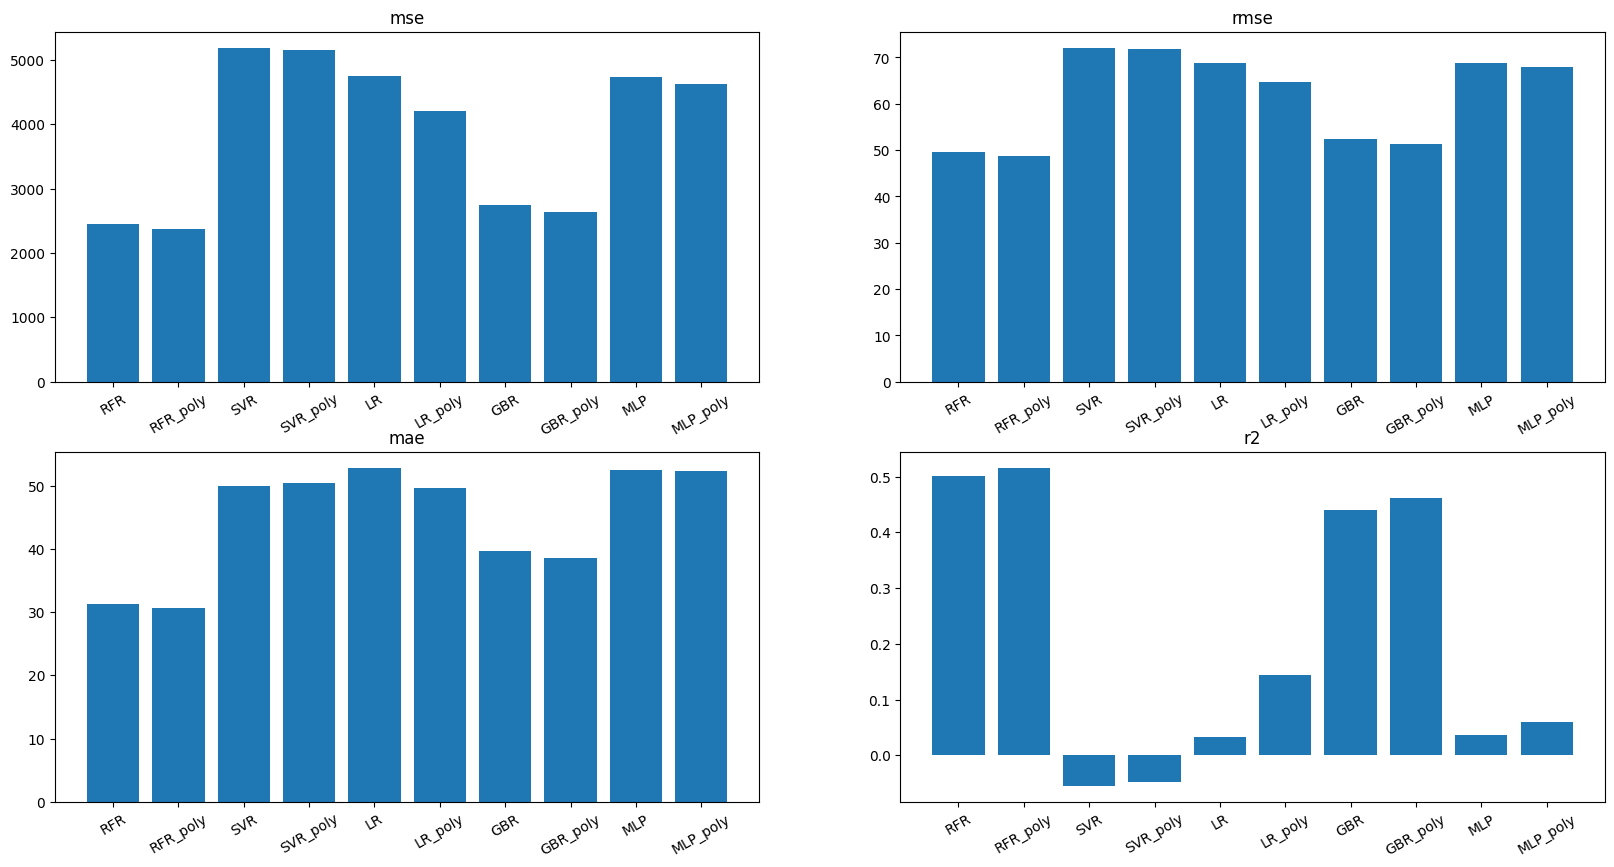

In [109]:
# visualize the metrics of each model
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['RFR', 'RFR_poly', 'SVR', 'SVR_poly', 'LR', 'LR_poly', 'GBR', 'GBR_poly', 'MLP', 'MLP_poly']
mse = [rfr_mse, rfr_poly_mse, svr_mse, svr_poly_mse, lr_mse, lr_poly_mse, gbr_mse, gbr_poly_mse, mlp_mse, mlp_poly_mse]
rmse = [rfr_rmse, rfr_poly_rmse, svr_rmse, svr_poly_rmse, lr_rmse, lr_poly_rmse, gbr_rmse, gbr_poly_rmse, mlp_rmse, mlp_poly_rmse]
mae = [rfr_mae, rfr_poly_mae, svr_mae, svr_poly_mae, lr_mae, lr_poly_mae, gbr_mae, gbr_poly_mae, mlp_mae, mlp_poly_mae]
r2 = [rfr_r2, rfr_poly_r2, svr_r2, svr_poly_r2, lr_r2, lr_poly_r2, gbr_r2, gbr_poly_r2, mlp_r2, mlp_poly_r2]

# spilt them into use and not use poly
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.bar(model_names, mse)
plt.xticks(rotation=30)
plt.title('mse')
plt.subplot(2,2,2)
plt.bar(model_names, rmse)
plt.xticks(rotation=30)
plt.title('rmse')
plt.subplot(2,2,3)
plt.bar(model_names, mae)
plt.xticks(rotation=30)
plt.title('mae')
plt.subplot(2,2,4)
plt.bar(model_names, r2)
plt.xticks(rotation=30)
plt.title('r2')
plt.show()



[learning_curve] Training set sizes: [ 338  677 1015 1354 1692 2031 2369 2708 3046 3385]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   22.1s


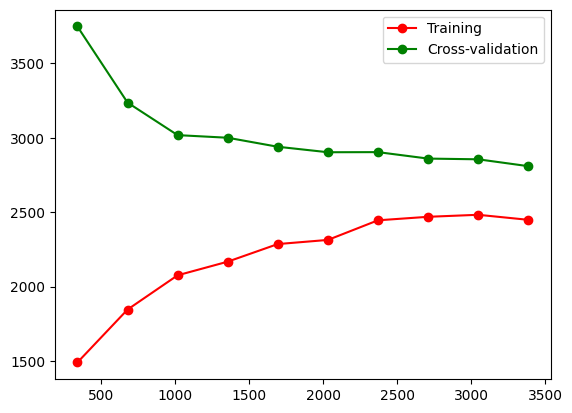

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   30.1s


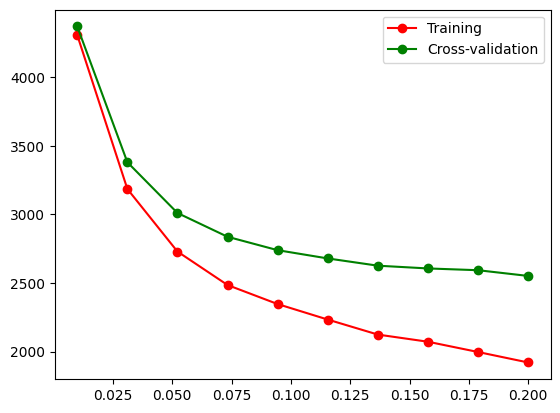

In [110]:
# therefore, we select GBR as the base model
from sklearn.ensemble import GradientBoostingRegressor
# draw the loss curve during training
from sklearn.model_selection import learning_curve

GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.08)
train_sizes, train_scores, test_scores = learning_curve(GBR, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1,1,10), verbose=1)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation')
plt.legend()
plt.show()

# draw the learning curve during training
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.01,0.2,10)
train_scores, test_scores = validation_curve(GBR, X_train, y_train, cv=5, param_name='learning_rate', param_range=param_range, scoring='neg_mean_squared_error', verbose=1)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training')

plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation')
plt.legend()
plt.show()

In [116]:
from sklearn import preprocessing
# only use x
GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
scaler = preprocessing.StandardScaler()
X_train_x = scaler.fit_transform(X_train_x.reshape(-1,1))
X_test_x = scaler.transform(X_test_x.reshape(-1,1))
GBR.fit(X_train_x,y_train_x)
y_pred = GBR.predict(X_test_x)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test_x, y_pred)
print('[GBR only x]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

# only use y
GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
scaler = preprocessing.StandardScaler()
X_train_y = scaler.fit_transform(X_train_y.reshape(-1,1))
X_test_y = scaler.transform(X_test_y.reshape(-1,1))
GBR.fit(X_train_y,y_train_y)
y_pred = GBR.predict(X_test_y)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test_y, y_pred)
print('[GBR only y]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

# use both x and y
GBR = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
print('[GBR x and y]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)


[GBR only x]
mse:  3550.4365478676414
rmse:  59.585539754773066
mae:  43.44313357595673
r2:  0.2766327408199516
[GBR only y]
mse:  4170.383623941083
rmse:  64.57850744590714
mae:  48.30173291620601
r2:  0.15032449359180033
[GBR x and y]
mse:  2511.504392268618
rmse:  50.11491187529534
mae:  35.587404171116184
r2:  0.48830516355936004


{'C': 1, 'kernel': 'linear'}
0.5444235111546523
accuracy_score 0.534466477809254


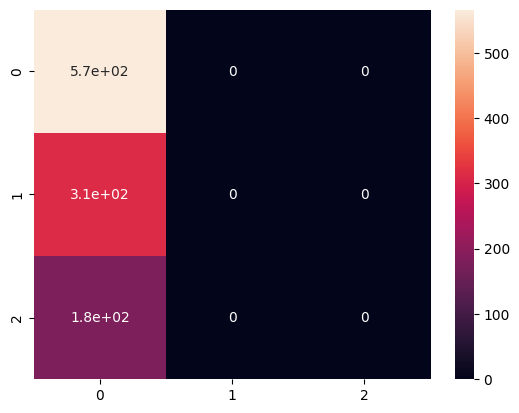

In [112]:
# now use classifier model， use SVM 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
df = pd.read_csv(path)

X_train = np.array([df['x'], df['y']]).T
# here we spilt z into 3 classes, when z < 80, z = 0; when 80 < z < 160, z = 1; when z > 160, z = 2
y_train_o = np.array(df['z'])
y_train = []
for i in y_train_o:
    if i < 80:
        y_train.append(0)
    elif i < 160:
        y_train.append(1)
    else:
        y_train.append(2)
y_train = np.array(y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

# use grid search to find the best parameters, use non-linear kernel
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC(kernel='rbf')

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('accuracy_score',accuracy_score(y_test, y_pred))

# draw fusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()




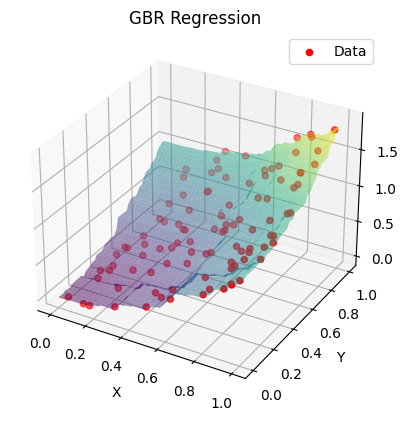

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import GradientBoostingRegressor

# 创建示例数据
x = np.random.rand(100)
y = np.random.rand(100)
z = x**2 + y**2  # 示例拟合曲线

# 训练 GBR 模型
gbr = GradientBoostingRegressor()
gbr.fit(np.column_stack((x, y)), z)

# 生成网格点
X, Y = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
Z = gbr.predict(np.column_stack((X.ravel(), Y.ravel())))
Z = Z.reshape(X.shape)

# 绘制3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', label='Data')  # 绘制原始数据点
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)  # 绘制拟合曲面
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('GBR Regression')
ax.legend()
plt.show()

In [117]:
# random save only 5000 columns of data
import pandas as pd
import numpy as np
import random
import os

path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
df = pd.read_csv(path)
df = df.sample(n=5000)
df.to_csv('/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data_5000.csv', index=False)

In [124]:
# calculate Kendall (KCC) between x, y and z
import pandas as pd
from scipy.stats import kendalltau

path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/all_data.csv'
data = pd.read_csv(path)
# only keep x,y,z
data = data[['x','y','z']]
# 对x,y,z三组数据进行kendall一致性检验，计算秩平均，中位数，W系数，p值


SignificanceResult(statistic=0.040432545511606015, pvalue=1.1092121954866604e-05)